In [1]:
import pandas as pd
import numpy as np
import collections
import itertools
import seaborn as sns

In [2]:
df = pd.read_excel('ObjectDetectionSurvey.xlsx').sort_values('Date').dropna(subset=['Affiliations'])

## Author count

In [3]:
a = np.array([])
for Authors in df.Author.values:
    a=np.r_[a,np.array(Authors.replace("\xa0","").split(','))]
c = collections.Counter(list(a))
c.most_common()

[('Ross Girshick', 11),
 ('Kaiming He', 8),
 ('Jian Sun', 5),
 ('Piotr Dollár', 5),
 ('Jitendra Malik', 3),
 ('Xiangyu Zhang', 3),
 ('Shaoqing Ren', 3),
 ('Joseph Redmon', 3),
 ('Ali Farhadi', 3),
 ('Wei Liu', 3),
 ('Alexander C. Berg', 3),
 ('Yurong Chen', 3),
 ('Tsung-Yi Lin', 3),
 ('Abhinav Gupta', 3),
 ('Junjie Yan', 3),
 ('Dumitru Erhan', 2),
 ('Christian Szegedy', 2),
 ('Dragomir Anguelov', 2),
 ('Wanli Ouyang', 2),
 ('Xiaogang Wang', 2),
 ('Xingyu Zeng', 2),
 ('Hongsheng Li', 2),
 ('Zhe Wang', 2),
 ('Bharath Hariharan', 2),
 ('Cheng-Yang Fu', 2),
 ('Tao Kong', 2),
 ('Anbang Yao', 2),
 ('Fuchun Sun', 2),
 ('Abhinav Shrivastava', 2),
 ('Bin Yang', 2),
 ('Zhen Lei', 2),
 ('Stan Z. Li', 2),
 ('Jifeng Dai', 2),
 ('Zhaowei Cai', 2),
 ('Nuno Vasconcelos', 2),
 ('Jianguo Li', 2),
 ('Jeff Donahue', 1),
 ('Trevor Darrell', 1),
 ('Alexander Toshev', 1),
 ('Pierre Sermanet', 1),
 ('David Eigen', 1),
 ('Xiang Zhang', 1),
 ('Michael Mathieu', 1),
 ('Rob Fergus', 1),
 ('Yann LeCun', 1),
 ('Shi

## Affilication count

In [4]:
a = np.array([])
for Affiliation in df.Affiliations.dropna().values:
    a=np.r_[a,np.array(Affiliation.replace("\xa0","").split(', '))]
c = collections.Counter(list(a))
c.most_common()

[('Microsoft', 7),
 ('Facebook AI', 7),
 ('Google', 5),
 ('Intel', 5),
 ('UW', 3),
 ('Carnegie Mellon', 3),
 ('UC Berkeley ', 2),
 ('CUHK', 2),
 ('UNC', 2),
 ('Cornell University', 2),
 ('TNList', 2),
 ('NLPR', 2),
 ('New York University', 1),
 ('Allen', 1),
 ('UNC,MagicLeap', 1),
 ('KAIST', 1),
 ('KU Leuven', 1),
 ('Inria', 1),
 ('CVL', 1),
 ('Zoox', 1),
 ('Umich', 1),
 ('UMD', 1),
 ('UIUC', 1),
 ('State Key', 1),
 ('NECLA', 1),
 ('Baidu', 1),
 ('Stanford', 1),
 ('SVCL,IBM', 1),
 ('UC Berkeley', 1),
 ('UW,Allen', 1),
 ('Amazon', 1),
 ('CSIRO', 1),
 ('Fudan', 1),
 ('NLPR,GE', 1),
 ('Tsinghua', 1),
 ('Megvii', 1),
 ('Beihang', 1),
 ('UC San Diego', 1),
 ('Peking ', 1),
 ('HIT', 1),
 ('Dalian', 1),
 ('UWO', 1),
 ('SJTU', 1),
 ('Toyota,DARPA', 1),
 ('Sun Yat-Sen,Huawei', 1),
 ('Peking', 1),
 ('DAMO', 1),
 ('Temple', 1),
 ('SenseTime ', 1),
 ('Incheon', 1)]

In [5]:
Author_coefmatrix = np.zeros((df.shape[0],df.shape[0]))

In [6]:
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        Ai = df.Author.values[i]
        Aj = df.Author.values[j]
        count = pd.DataFrame(Ai.replace("\xa0","").split(',')+Aj.replace("\xa0","").split(',')).duplicated()
        Author_coefmatrix[i,j] = count.sum()/len(count)*2

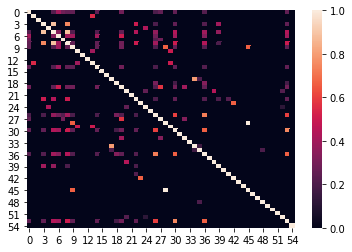

In [7]:
sns.heatmap(Author_coefmatrix)

In [8]:
Affilications_coefmatrix = np.zeros((df.shape[0],df.shape[0]))

In [9]:
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        Ai = df.Affiliations.values[i]
        Aj = df.Affiliations.values[j]
        count = pd.DataFrame(Ai.replace("\xa0","").split(',')+Aj.replace("\xa0","").split(', ')).duplicated()
        Affilications_coefmatrix[i,j] = count.sum()/len(count)*2

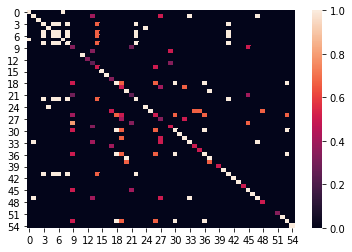

In [10]:
sns.heatmap(Affilications_coefmatrix)

## 相関分析

In [11]:
import GraphicalLasso.GraphicalLasso_MarkovGraph

In [12]:
r = 0.9
matrix = r*Author_coefmatrix+(1-r)*Affilications_coefmatrix

In [13]:
dfX = pd.DataFrame(np.random.multivariate_normal(np.zeros(df.shape[0]),matrix,size=1000),columns=df.Meta)

/home/neuron/python_install/python3_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


In [14]:
alpha =0.05
model = GraphicalLasso.GraphicalLasso_MarkovGraph.GraphicalLasso(alpha=alpha,
                                                  max_iter=100,                     
                                                  verbose=True,
                                                  assume_centered = True)

In [15]:
model.fit(dfX)

[graphical_lasso] Iteration   0, cost  2.43e+02, dual gap 1.810e+00
[graphical_lasso] Iteration   1, cost  2.43e+02, dual gap 2.601e-02
[graphical_lasso] Iteration   2, cost  2.43e+02, dual gap -6.742e-04
[graphical_lasso] Iteration   3, cost  2.43e+02, dual gap -2.676e-04
[graphical_lasso] Iteration   4, cost  2.43e+02, dual gap -8.904e-04
[graphical_lasso] Iteration   5, cost  2.43e+02, dual gap -7.037e-04
[graphical_lasso] Iteration   6, cost  2.43e+02, dual gap -4.107e-04
[graphical_lasso] Iteration   7, cost  2.43e+02, dual gap -6.712e-04
[graphical_lasso] Iteration   8, cost  2.43e+02, dual gap -4.453e-04
[graphical_lasso] Iteration   9, cost  2.43e+02, dual gap -4.083e-04
[graphical_lasso] Iteration  10, cost  2.43e+02, dual gap -3.885e-04
[graphical_lasso] Iteration  11, cost  2.43e+02, dual gap -3.139e-04
[graphical_lasso] Iteration  12, cost  2.43e+02, dual gap -1.652e-04
[graphical_lasso] Iteration  13, cost  2.43e+02, dual gap -1.890e-04
[graphical_lasso] Iteration  14, cos

GraphicalLasso(alpha=0.05, assume_centered=True, enet_tol=0.0001,
        max_iter=100, mode='cd', tol=0.0001, verbose=True)

In [18]:
Markov = GraphicalLasso.GraphicalLasso_MarkovGraph.MarkovGraph(X=dfX,model=model)

Cluster 1: ['SPP-Net' 'NoCs' 'Faster R-CNN' 'ION' 'R-FCN' 'Light-Head R-CNN'
 'Relation-Net']
Cluster 2: ['DeepMultiBox ' 'ParseNet' 'SSD' 'DSSD']
Cluster 3: ['G-CNN' 'HyperNet' 'PVANet' 'RON' 'DSOD' 'R-DAD']
Cluster 4: ['R-CNN' 'Fast R-CNN' 'OHEM' 'Top-Down Modulation' 'SMN']
Cluster 5: ['CRAFT' 'CoupleNet' 'RefineDet' 'Pelee' 'Grid R-CNN']
Cluster 6: ['DeepProposal' 'MS-CNN' 'Cascade R-CNN']
Cluster 7: ['DeepID-Net' 'AttentionNet' 'GBD-Net']
Cluster 8: ['OverFeat' 'SubCNN' 'DeNet']
Cluster 9: ['DeepBox' 'MPN' 'FPN' 'Mask R-CNN' 'RetinaNet' 'MLKB' 'HKRM' 'PFPN']
Cluster 10: ['YOLO' 'YOLO9000' 'YOLOv3']
Cluster 11: ['MobileNets' 'ESSD' 'PPN' 'Tiny-DSOD']
Cluster 12: ['AZNet' 'RFBNet' 'CornerNet' 'M2Det']


In [19]:
Markov.set_LocallyLinearEmbeddingThreshold(0.01,random_state=2)

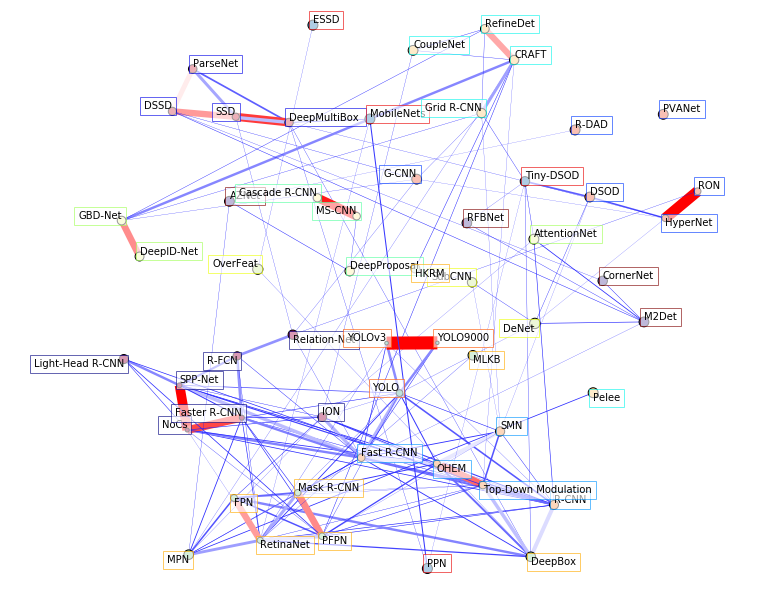

In [20]:
fig,ax = Markov.plot(line_cmap='bwr')

## 補正

Author countで相関値を重み付けしたい

In [21]:
a = np.array([])
for Authors in df.Author.values:
    a=np.r_[a,np.array(Authors.replace("\xa0","").split(','))]
c = collections.Counter(list(a))
common = c.most_common(4)
weight_ath = np.c_[np.array(common),np.array([np.array(common)[:,1].astype(int)/np.array(common)[:,1].astype(int).max()]).T]

Affilicationで相関値を重み付けしたい

In [22]:
a = np.array([])
for Aff in df.Affiliations.values:
    a=np.r_[a,np.array(Aff.replace("\xa0","").split(', '))]
c = collections.Counter(list(a))
common = c.most_common(4)
weight_aff = np.c_[np.array(common),np.array([np.array(common)[:,1].astype(int)/np.array(common)[:,1].astype(int).max()]).T]

In [55]:
Author_coefmatrix = np.zeros((df.shape[0],df.shape[0]))
p=0.8
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        alpha=0
        Ai = df.Author.values[i]
        Aj = df.Author.values[j]
        data = pd.DataFrame(Ai.replace("\xa0","").split(',')+Aj.replace("\xa0","").split(','))[0]
        count = data.duplicated()
        for k in range(4):
            if np.any(pd.DataFrame(Ai.replace("\xa0","").split(',')+Aj.replace("\xa0","").split(','))[0].str.contains(weight_ath[k,0])):
                alpha += float(weight_ath[k,2])*p
        Author_coefmatrix[i,j] = (count.sum()+alpha)/(len(count)*0.5+alpha)

In [50]:
Affilications_coefmatrix = np.zeros((df.shape[0],df.shape[0]))
p=0.4
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        alpha=0
        Ai = df.Affiliations.values[i]
        Aj = df.Affiliations.values[j]
        data = pd.DataFrame(Ai.replace("\xa0","").split(',')+Aj.replace("\xa0","").split(','))[0]
        count = data.duplicated()
        for k in range(4):
            if np.any(pd.DataFrame(Ai.replace("\xa0","").split(',')+Aj.replace("\xa0","").split(','))[0].str.contains(weight_aff[k,0])):
                alpha += float(weight_aff[k,2])*p
        Affilications_coefmatrix[i,j] = (count.sum()+alpha)/(len(count)*0.5+alpha)

/home/neuron/python_install/python3_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Cluster 1: ['R-CNN' 'DeepMultiBox ' 'OverFeat' 'SPP-Net' 'NoCs' 'Fast R-CNN'
 'DeepBox' 'Faster R-CNN' 'DeepProposal' 'ION' 'AZNet' 'R-FCN' 'PVANet'
 'DeNet' 'Light-Head R-CNN' 'RFBNet' 'Relation-Net' 'ESSD' 'Pelee' 'PPN'
 'Tiny-DSOD' 'CornerNet' 'HKRM' 'M2Det' 'R-DAD']
Cluster 2: ['HyperNet' 'RON' 'DSOD']
Cluster 3: ['OHEM' 'Top-Down Modulation' 'SMN']
Cluster 4: ['CRAFT' 'CoupleNet' 'RefineDet' 'Grid R-CNN']
Cluster 5: ['DeepID-Net' 'GBD-Net']
Cluster 6: ['ParseNet' 'SSD' 'DSSD']
Cluster 7: ['AttentionNet' 'G-CNN' 'MPN' 'FPN' 'Mask R-CNN' 'MobileNets' 'RetinaNet'
 'MLKB' 'PFPN']
Cluster 8: ['MS-CNN' 'Cascade R-CNN']
Cluster 9: ['YOLO' 'SubCNN' 'YOLO9000' 'YOLOv3']


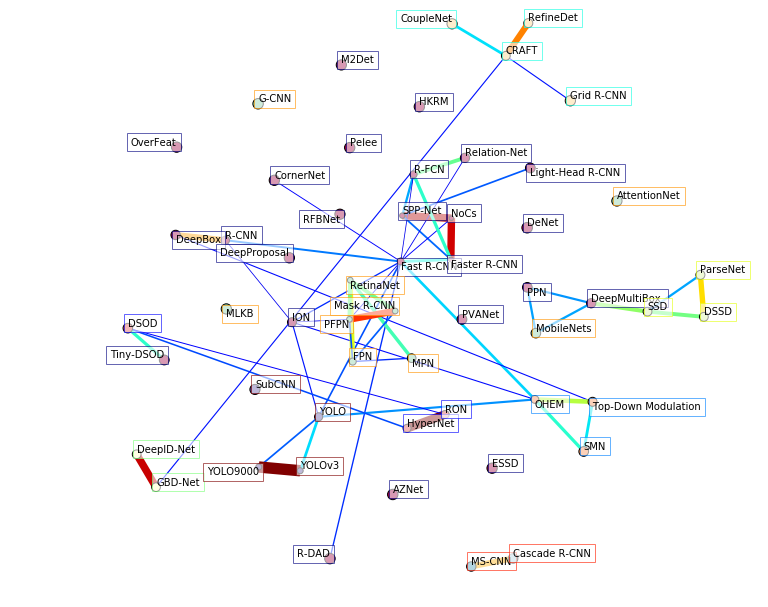

In [62]:
r = 0.7
matrix = r*Author_coefmatrix+(1-r)*Affilications_coefmatrix
dfX = pd.DataFrame(np.random.multivariate_normal(np.zeros(df.shape[0]),matrix,size=5000),columns=df.Meta)
alpha =0.1
model = GraphicalLasso.GraphicalLasso_MarkovGraph.GraphicalLasso(alpha=alpha,
                                                  max_iter=100,                     
                                                  verbose=False,
                                                  assume_centered = True)
model.fit(dfX)
Markov = GraphicalLasso.GraphicalLasso_MarkovGraph.MarkovGraph(X=dfX,model=model)
Markov.set_LocallyLinearEmbeddingThreshold(0.05,random_state=1)
fig,ax = Markov.plot(line_cmap='jet')

In [63]:
for i,row in df.iterrows():
    if 'Google' in row['Affiliations'].replace("\xa0","").split(', '):
        print(row['Meta']) 

DeepMultiBox 
SSD
Top-Down Modulation
MobileNets
PPN


In [57]:
weight_ath

array([['Ross Girshick', '11', '1.0'],
       ['Kaiming He', '8', '0.7272727272727273'],
       ['Jian Sun', '5', '0.45454545454545453'],
       ['Piotr Dollár', '5', '0.45454545454545453']], dtype='<U32')

In [65]:
weight_aff

array([['Microsoft', '7', '1.0'],
       ['Facebook AI', '7', '1.0'],
       ['Google', '5', '0.7142857142857143'],
       ['Intel', '5', '0.7142857142857143']], dtype='<U32')